# Threshold optimization 

Jukes Liu

## Import packages and set paths

In [258]:
import pandas as pd
import numpy as np
import os
import subprocess
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg
import matplotlib.pylab as pl
import numpy.ma as ma
import datetime
import math
import scipy.optimize
import time
import random

In [259]:
basepath = '/media/jukes/jukes1/'
sg_path = '/home/jukes/Documents/Sample_glaciers/'

## Read in analysis dates for manual and automated delinations, convert to datetime objs

In [3]:
# #read in manual image dates
# manual_df= pd.read_csv(basepath+'Manual/manual_tpos.csv', sep=',', dtype=str, header=0)
# manual_df = manual_df.dropna()
# manual_df.drop_duplicates(subset=['BoxID','datetimes'])
# print(manual_df.shape)
# manual_df.head()

In [4]:
# #Read in datetags csv as datetime_df
# automated_df = pd.read_csv(sg_path+'imgdates.csv', sep=',', dtype=str, header=0, names=['Scene', 'datetimes'])
# print(automated_df.shape)
# automated_df.head()

## Find overlaps and select 90% for training, 10% for testing

In [5]:
# overlap_df = manual_df.merge(automated_df, how='inner', on=['datetimes'])
# overlap_df = overlap_df.drop(['Line_x', 'Line_y'], axis=1)
# overlap_df = overlap_df.drop_duplicates(['BoxID','datetimes'])
# overlap_df = overlap_df.sort_values(by=['BoxID','datetimes'], ascending=True)
# overlap_df.shape

In [6]:
# dates = []
# for idx, row in overlap_df.iterrows():
#     dateID = str(row['BoxID'])+','+str(row['datetimes']+','+str(row['Scene']))
#     dates.append(dateID)
# # print(date_IDs)

### Select 90% for training

In [7]:
# N = len(dates); print(N)

# #pick a random sample of dates for training
# train_dates = random.sample(dates, int(N*0.9))
# print(len(train_dates))
# # print(train_dates)

# #grab remaining for testing
# test_dates = []
# for date in dates:
#     if date not in train_dates:
#         test_dates.append(date)
# print(len(test_dates))
# # print(test_dates)

# #Check that they don't overlap, should return empty
# print(len(train_dates)+len(test_dates)); print(set(train_dates).intersection(test_dates))

In [8]:
# boxes = []; imgdates = []; scenes = []

# for td in train_dates:
#     BoxID, imgdate, scene = td.split(',')
#     boxes.append(BoxID); imgdates.append(imgdate); scenes.append(scene)

# train_df = pd.DataFrame(list(zip(boxes, imgdates, scenes)), columns=['BoxID', 'datetime', 'Scene'])
# train_df.head()

In [9]:
# #export to csv and text
# train_df.to_csv(basepath+'/Manual/train.csv', sep=',', index=False, header=False)
# train_df.to_csv(basepath+'/Manual/train.txt', sep=' ', index=False, header=False)

### Grab test dates

In [10]:
# boxes = []; imgdates = []; scenes = []

# for td in test_dates:
#     BoxID, imgdate, scene = td.split(',')
#     boxes.append(BoxID); imgdates.append(imgdate); scenes.append(scene)

# test_df = pd.DataFrame(list(zip(boxes, imgdates, scenes)), columns=['BoxID', 'datetime', 'Scene'])
# # test_df.head()
# #export to csv and text
# test_df.to_csv(basepath+'/Manual/test.csv', sep=',', index=False, header=False)
# test_df.to_csv(basepath+'/Manual/test.txt', sep=' ', index=False, header=False)

## Run the optimization

    scipy.optimize.fmin(func, x0, args=(), xtol=0.0001, ftol=0.0001, maxiter=None, maxfun=None, full_output=0, disp=1, retall=0, callback=None, initial_simplex=None)[source]

Minimize a function using the downhill simplex algorithm.
This algorithm only uses function values, not derivatives or second derivatives.

Parameters
   - funccallable func(x,*args)
The objective function to be minimized.

   - x0ndarray
Initial guess.

Returns
   - xoptndarray
Parameter that minimizes function.

   - foptfloat
Value of function at minimum: fopt = func(xopt).

   - iterint
Number of iterations performed.

   - funcallsint
Number of function calls made.

   - warnflagint
1 : Maximum number of function evaluations made. 2 : Maximum number of iterations reached.

    -allvecslist
Solution at each iteration.

In [3]:
# # IMPORT THE OBJECTIVE FUNCTION
# os.chdir('/home/jukes/automated-glacier-terminus')
# from automated_terminus_functions import objective_func

In [4]:
# # WTMM THRESHOLDS
# #create the thresholds to input into the objective function
# base_size_thresh = 0.71; base_mod_thresh = 0.7; base_arg_thresh = 0.46;
# thresh_range = 0.05; step=0.01;
# # size_guesses = np.arange(base_size_thresh-thresh_range-step, base_size_thresh+thresh_range, step)
# # size_guesses = np.arange(0, 1, step)
# # size_guesses = [0.71]
# # size_guesses = np.arange(0.64, 0.77, 0.01)
# size_guesses = np.arange(0, 1, 0.1)
# # mod_guesses = np.arange(base_mod_thresh-thresh_range, base_mod_thresh+thresh_range, step)
# # mod_guesses = [0.7]
# mod_guesses = np.arange(0, 1, 0.1)
# # arg_guesses = np.arange(base_arg_thresh-thresh_range-step, base_arg_thresh+thresh_range, step)
# # arg_guesses = np.arange(0.41, 0.51, 0.01)
# arg_guesses = [0]
# # display the threshold guesses
# print(size_guesses); print(mod_guesses); print(arg_guesses)

# # FILTERING SCALARS
# # N1s = np.arange(5, 8, 1); print(N1s)
# v_guesses = np.arange(1, 8, 1); 
# v_guesses = [3]; print(v_guesses)
# N1s = [1]; print(N1s)
# N2s = [1]; print(N2s)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[0]
[3]
[1]
[1]


In [5]:
# # create list of thresholding orders to test
# # orders = ['_AMS', '_ASM', '_MAS', '_MSA', '_MSA', '_SAM', '_SMA']
# orders = ['_MSA']
# n_iter = len(orders)*len(size_guesses)*len(mod_guesses)*len(arg_guesses)*len(v_guesses)*len(N1s)*len(N2s)
# print(n_iter, 'iterations'); # print(n_iter*20/60, "max hours to run")

100 iterations


### Test the thresholds:

In [ ]:
# run test script!
runsh = 'cd /home/jukes/Documents/Scripts/; chmod +x write_test.sh; ./write_test.sh'
subprocess.call(runsh, shell=True)

## Run optimization - for faster analysis use objective_func_2.sh

In [264]:
# run shell script
runsh = 'cd /home/jukes/Documents/Scripts/; chmod +x objective_func_2.sh; ./objective_func_2.sh'
subprocess.call(runsh, shell=True)

KeyboardInterrupt: 

In [ ]:
# # set parameters
# order = '_MSA'
# s = 0.71
# m = 0.70
# a = 0.46
# dataset = 'train'
# BoxIDs=['001', '002', '120', '174', '259']
# parameters = [str(order), str(s), str(m), str(a), dataset, " ".join(BoxIDs)]
# input_params= " ".join(parameters);

# # run shell script
# runsh = 'cd /home/jukes/Documents/Scripts/; chmod +x parallel_terminuspick.sh; ./parallel_terminuspick.sh 8 '+input_params
# subprocess.call(runsh, shell=True)

In [ ]:
# import subprocess
# import pandas as pd; import numpy as np
# import time

# start_time = time.time() #start recording time

# slist = []; mlist = []; alist = []; orderlist = []; thetalist = []; runtimes = []; 
# N1list = []; N2list = []; v_list = []; #store run results

# iter_count = 0
# for order in orders:
#     for s in size_guesses:
#         for m in mod_guesses:
#             for a in arg_guesses:
#                 for N1 in N1s:
#                     for N2 in N2s:
#                         for v in v_guesses:
#                             t0 = time.time() # start recording time for each run
#                             # make sure precision and format is correct for the thresholds
#                             s = float("{0:.3f}".format(s)); m = float("{0:.3f}".format(m)); a = float("{0:.3f}".format(a));
#                             print(order[1:4], s, m, a, N1, N2)
                            
#                             #append the thresholds and order to lists
#                             slist.append(s); mlist.append(m); alist.append(a); orderlist.append(order[1:4]) 
#                             N1list.append(N1); N2list.append(N2); v_list.append(v)

#                             #run objective function calculation
#                             theta = objective_func(s, m, a, order, 'train', v, N1, N2, '2020_05_23'); 
#                             print(theta); thetalist.append(theta)

#                             runtime = time.time() - t0; runtimes.append(runtime) # calculate run time and store
#                             print("Iteration run time: %s seconds " % runtime) #print run time for each iteration

#                             iter_count = iter_count+1
#                             print("Progress: "+str(iter_count/n_iter*100)+" %")

# print("Total time elapsed: --- %s seconds ---" % (time.time() - start_time)) #Print total time elapsed

In [ ]:

# optimization_df = pd.DataFrame(list(zip(thetalist, orderlist, slist, mlist, alist, runtimes, N1list, N2list, v_list)), 
#                                columns=['Theta', 'Order', 'Size_thresh', 'Mod_thresh', 'Arg_thresh','run_time', 'N1', 'N2', 'v'])
# optimization_df

In [ ]:
# #print thresholds that yielded the minimum misfit
# optimization_df[optimization_df['Theta'] == np.min(optimization_df['Theta'])]

In [ ]:
# #write to csv
# optimization_df.to_csv(sg_path+'optimizationresults_vmax.csv', sep=',')

# Visualize optimization results

Results from calculating mistfits between automated and manual delineations based on different thresholds used for filtering the WTMM lines. The two thresholds shown here are the size (length) threshold and the mod (gradient value) threshold, which are percentages of the maximum size/mod. So ideally, for 1 parameter (one threshold), the results should look like a parabola. For two 2 parameters like used here, one can visualize it in 3D. 

In [232]:
#plot results
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

#activate interactive widgets for plots:
%matplotlib notebook

# path = '/Users/julialiu/Documents/BSU/EGG/'

In [262]:
df1 = pd.read_csv(sg_path+'optimizationresults_c1_MSA_1.csv', sep=',', header=0, names=['Size_thresh', 'Mod_thresh', 'Arg_thresh', 'Theta'])
# df2 = pd.read_csv(sg_path+'optimizationresults_c1_2.csv', sep=',', header=0, names=['Size_thresh', 'Mod_thresh', 'Arg_thresh', 'Theta'])
# df3 = pd.read_csv(sg_path+'optimizationresults_c1_3.csv', sep=',')
# # # df4 = pd.read_csv(sg_path+'optimizationresults_4.csv', sep=',')
# optimization_df = pd.concat([df1, df2, df3])
optimization_df = df1
# optimization_df = pd.concat([df1, df2])
# optimization_df = pd.read_csv(sg_path+'optimizationresults_SA_total.csv', sep=',')
optimization_df.head(10)
# df3.head()

,Size_thresh,Mod_thresh,Arg_thresh,Theta
0,0.2,0.5,0.1,71.109745
1,0.2,0.5,0.2,75.165978
2,0.2,0.5,0.3,87.767377
3,0.2,0.5,0.4,107.092265
4,0.2,0.5,0.5,94.908322
5,0.2,0.6,0.1,70.139384
6,0.2,0.6,0.2,73.467473
7,0.2,0.6,0.3,92.505458
8,0.2,0.6,0.4,96.015831
9,0.2,0.6,0.5,114.997803


In [250]:
optimization_df.to_csv(sg_path+'optimizationresults_c1_SM_total.csv', sep=',')

Separate by Order

In [220]:
# order = 'MSA'
# order_df = optimization_df[optimization_df['Order']==order]
# # order_df

# x = order_df['Size_thresh']
# y = order_df['Mod_thresh']
# z = order_df['Arg_thresh']
# theta = order_df['Theta']


<IPython.core.display.Javascript object>


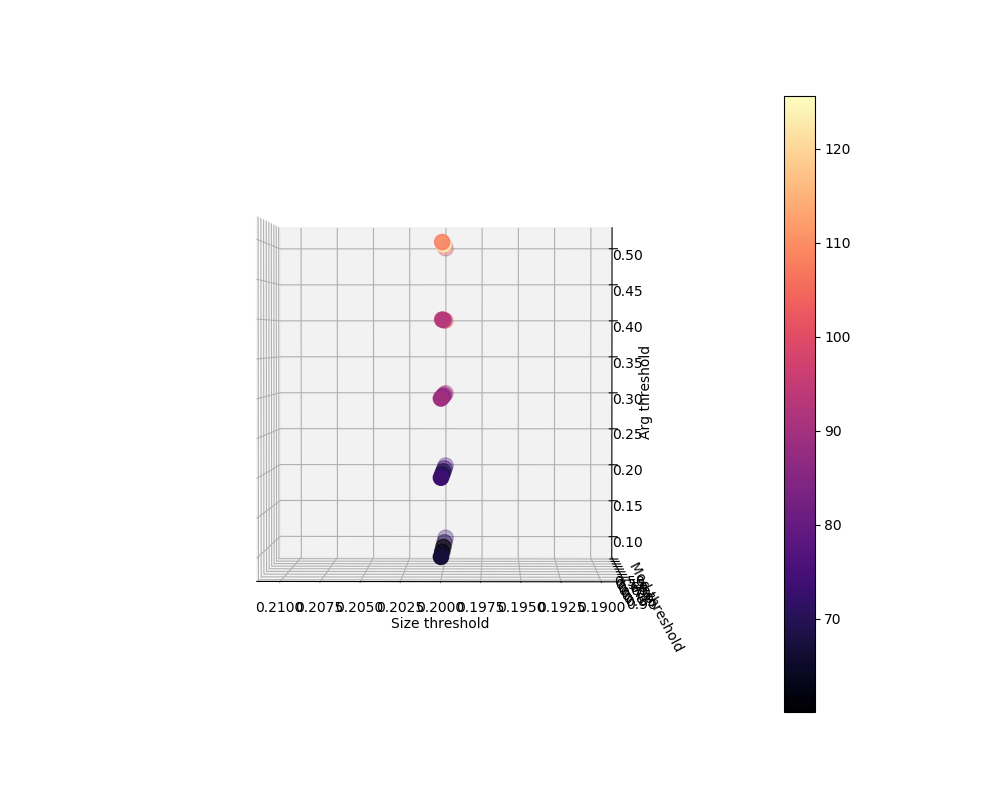

In [263]:
# 3 parameters
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1, projection='3d')
x = optimization_df['Size_thresh']
y = optimization_df['Mod_thresh']
z = optimization_df['Arg_thresh']
theta = optimization_df['Theta']

# ax.plot_trisurf(triang, z, cmap='hot') # plot the surface over the mesh
plot = ax.scatter(x,y,z, marker='o', s=120, c=theta, cmap='magma') # plot the points
ax.view_init(elev=20, azim=45) # set initial view angle
fig.colorbar(plot)

ax.set_xlabel('Size threshold')
ax.set_ylabel('Mod threshold')
ax.set_zlabel('Arg threshold')
plt.show()

In [251]:
# optimization_df = optimization_df[optimization_df['Size_thresh'] > 0.63]
x = optimization_df['Size_thresh']
y = optimization_df['Mod_thresh']
z = optimization_df['Theta']

<IPython.core.display.Javascript object>


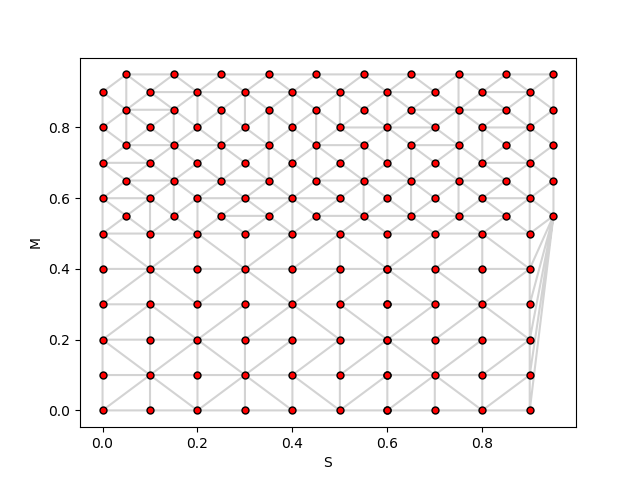

In [252]:
triang = mtri.Triangulation(x, y)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.triplot(triang, c="#D3D3D3", marker='.', markerfacecolor="r", markeredgecolor="black", markersize=10)
ax.set_xlabel('S')
ax.set_ylabel('M')
plt.show()

<IPython.core.display.Javascript object>


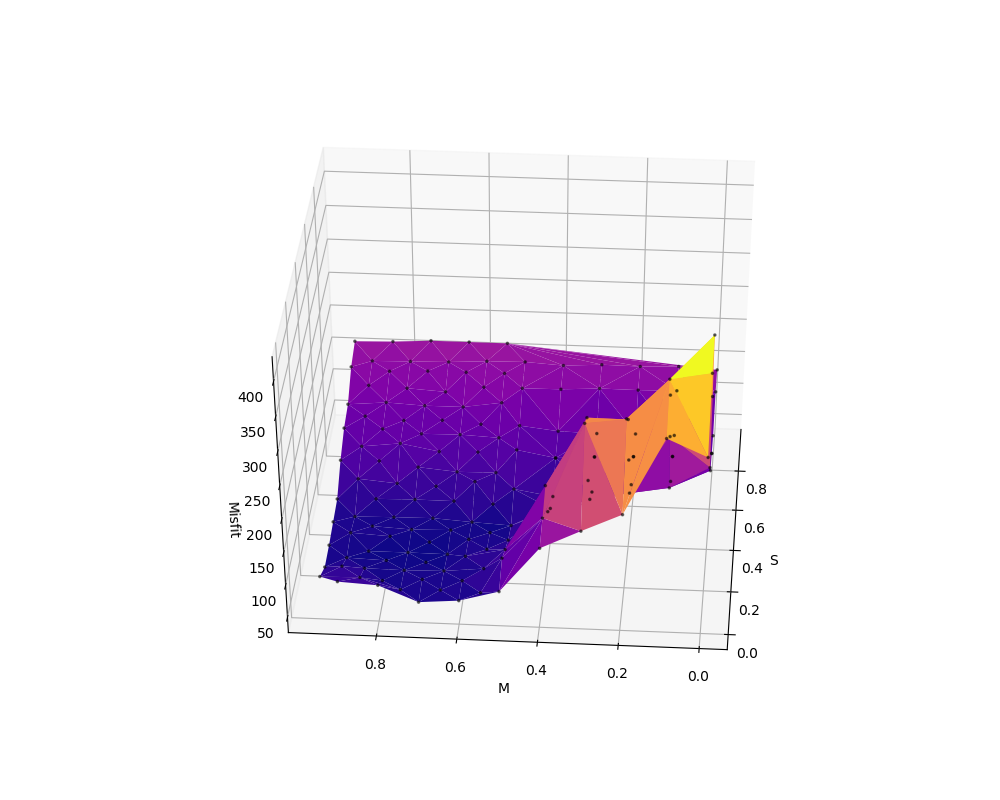

In [253]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_trisurf(triang, z, cmap='plasma') # plot the surface over the mesh
ax.scatter(x,y,z, marker='.', s=10, c="k", alpha=0.5) # plot the points
ax.view_init(elev=20, azim=45) # set initial view angle

ax.set_xlabel('S')
ax.set_ylabel('M')
ax.set_zlabel('Misfit')
plt.show()

In [ ]:
# # order boxplot
# df1 = pd.read_csv(sg_path+'optimizationresults_order.csv', sep=',')
# df2 = pd.read_csv(sg_path+'optimizationresults_order2.csv', sep=',')
# optimization_df = pd.concat([df1, df2])

# import seaborn as sns

# plt.figure(figsize=(10,8))
# sns.set_style('darkgrid')
# ax = sns.boxplot(x = 'Order', y = 'Theta', data=optimization_df)
# plt.ylabel('Misfit', fontsize=16); plt.xlabel('Filtering Order', fontsize=16)
# plt.xticks(fontsize=16); plt.yticks(fontsize=16)
# plt.savefig(sg_path+'Misfit_by_order.png', dpi=200)
# plt.show()

In [ ]:
# orderdf = optimization_df[optimization_df['Order']=='MAS']
# print(np.median(list(orderdf.Theta)))
# print(np.average(list(orderdf.Theta)))

### Contour plot

In [254]:
import matplotlib.tri as tri
# import scipt.ndimage
from scipy.interpolate import griddata

# optimization_df = optimization_df[optimization_df['Size_thresh'] > 0.63]
x = optimization_df['Size_thresh']
y = optimization_df['Mod_thresh']
z = optimization_df['Theta']

grid = np.array(list(zip(x,y))); grid.shape

# smooth the data
z_interp = griddata(grid, z, (x,y), method='cubic')

In [ ]:
# len(grid_interp)

<IPython.core.display.Javascript object>


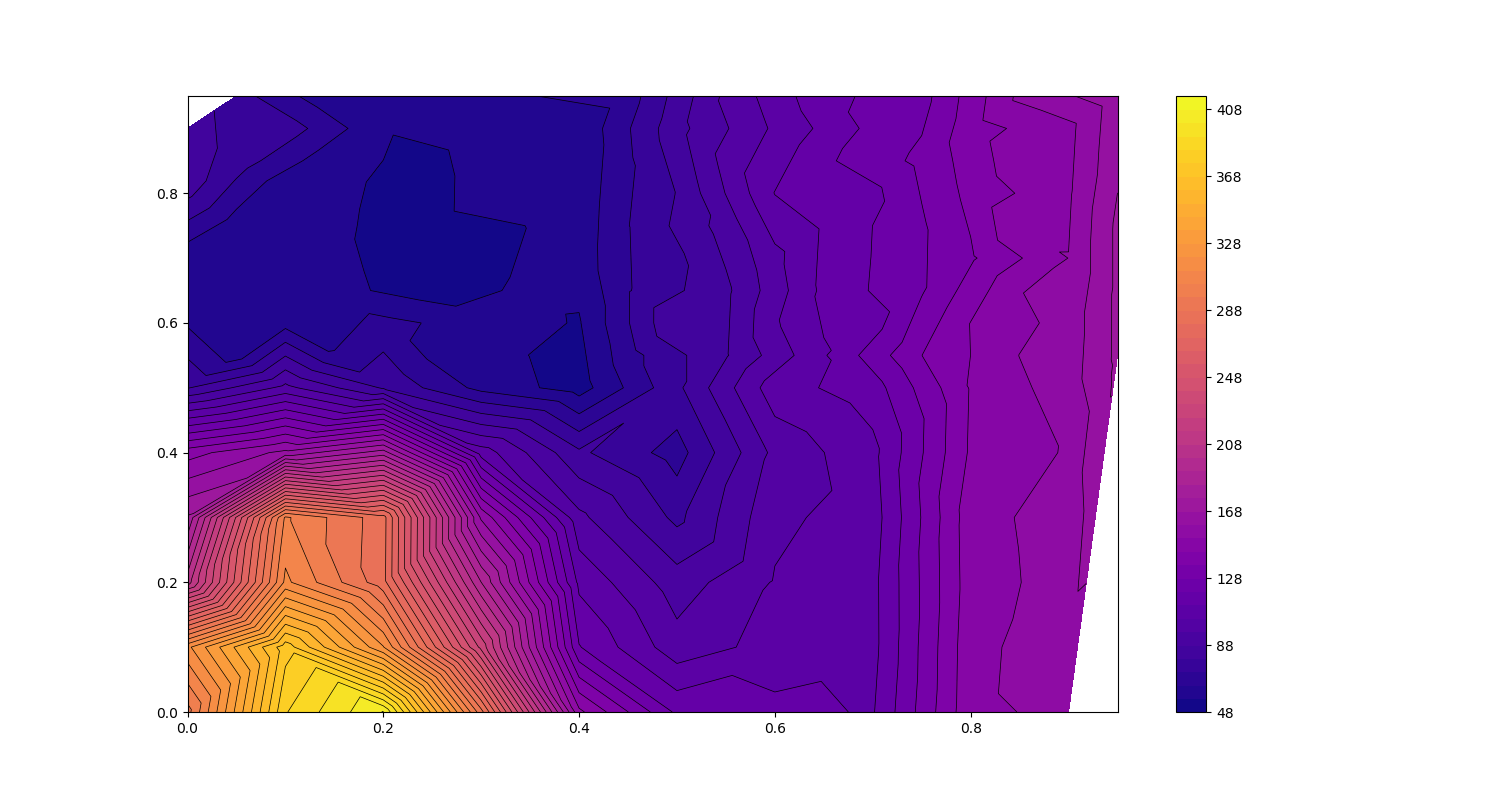

In [257]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
intervals = 50
ax.tricontour(x,y,z_interp,levels=intervals,linewidths=0.5, colors='k')
cntr = ax.tricontourf(x,y,z_interp,levels=intervals, cmap='plasma')
fig.colorbar(cntr, ax=ax)
plt.show()

In [ ]:
# import sys
# # !{sys.executable} -m pip install psutil requests

# import plotly.graph_objects as go
# import plotly as py
# import psutil

In [ ]:
# fs = 20
# contour_set = dict(showlabels= True, labelfont=dict(size=14, color='black'))
# colorbar_set = dict(title='Cost (m)', titleside='right', titlefont=dict(size=fs), tickfont=dict(size=fs))

# fig = go.Figure(data=go.Contour(z=z, x=x, y=y, contours=contour_set, colorbar=colorbar_set, ncontours=16))
# fig.update_xaxes(title='C<sub>L</sub>', titlefont=dict(size=fs), tickfont=dict(size=fs))
# fig.update_yaxes(title='C<sub>A</sub>', titlefont=dict(size=fs), tickfont=dict(size=fs))
# # fig.update_xaxes(title='N<sub>1</sub>', titlefont=dict(size=fs), tickfont=dict(size=fs))
# # fig.update_yaxes(title='N<sub>2</sub>', titlefont=dict(size=fs), tickfont=dict(size=fs))
# fig.show()
# # py.toImage(fig, {format:'jpeg', height:500, width:1200})

## Cross-validation

Using optimal thresholds identified: size=0.71, mod=0.7, arg=0.46.

In [ ]:
# #print thresholds that yielded the minimum misfit
# minimum_df = optimization_df[optimization_df['Theta'] == np.min(optimization_df['Theta'])]
# minimum_df

In [ ]:
# # final thresholds
# # s=0.71; m=0.7; a=0.46; order='_MSA'
# s=list(minimum_df.Size_thresh)[0]; m=list(minimum_df.Mod_thresh)[0]; a=list(minimum_df.Arg_thresh)[0]; order='_MSA'

# sfinal = float("{0:.3f}".format(s)); mfinal = float("{0:.3f}".format(m)); afinal = float("{0:.3f}".format(a));

# t0 = time.time() # start recording time
                
# #run objective function calculation
# theta = objective_func(sfinal, mfinal, afinal, order, 'test'); print(theta);
# runtime = time.time() - t0; print("Run time: %s seconds " % runtime) #print run time